In [1]:
import pandas as pd
import numpy as np

import platform
import matplotlib.pyplot as plt

%matplotlib inline


plt.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
population = pd.read_excel('../data/05. population_raw_data.xlsx', header=1)
population.fillna(method='pad', inplace=True)

population.rename(columns = {'행정구역(동읍면)별(1)':'광역시도', 
                             '행정구역(동읍면)별(2)':'시도', 
                             '계':'인구수'}, inplace=True)

population = population[(population['시도'] != '소계')]

population

,광역시도,시도,항목,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
6,서울특별시,종로구,총인구수 (명),144575,9919,12821,10326,9068,8886,6255,5401,4148,2096,740,212,37
7,서울특별시,종로구,남자인구수 (명),70092,4556,6367,5242,4423,4386,2872,2317,1712,809,222,72,11
8,서울특별시,종로구,여자인구수 (명),74483,5363,6454,5084,4645,4500,3383,3084,2436,1287,518,140,26
9,서울특별시,중구,총인구수 (명),122167,7353,10790,10455,9365,8044,5619,4612,3363,1724,682,156,28
10,서울특별시,중구,남자인구수 (명),59446,3293,5070,5218,4697,3970,2652,1984,1335,544,185,39,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832,제주특별자치도,제주시,남자인구수 (명),246383,15942,16532,14159,16672,11807,7916,6000,3904,1774,424,52,6
833,제주특별자치도,제주시,여자인구수 (명),246536,14051,15179,13656,16630,12453,9023,7653,6427,4411,1912,580,129
834,제주특별자치도,서귀포시,총인구수 (명),184224,9194,9305,8531,10901,11318,8538,6931,5574,3355,1115,261,76
835,제주특별자치도,서귀포시,남자인구수 (명),92865,4953,5025,4297,5392,5523,4086,3092,2083,985,198,32,3


In [3]:
population.is_copy = False

population.rename(columns = {'항목':'구분'}, inplace=True)

population.loc[population['구분'] == '총인구수 (명)', '구분'] = '합계'
population.loc[population['구분'] == '남자인구수 (명)', '구분'] = '남자'
population.loc[population['구분'] == '여자인구수 (명)', '구분'] = '여자'

population

,광역시도,시도,구분,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
6,서울특별시,종로구,합계,144575,9919,12821,10326,9068,8886,6255,5401,4148,2096,740,212,37
7,서울특별시,종로구,남자,70092,4556,6367,5242,4423,4386,2872,2317,1712,809,222,72,11
8,서울특별시,종로구,여자,74483,5363,6454,5084,4645,4500,3383,3084,2436,1287,518,140,26
9,서울특별시,중구,합계,122167,7353,10790,10455,9365,8044,5619,4612,3363,1724,682,156,28
10,서울특별시,중구,남자,59446,3293,5070,5218,4697,3970,2652,1984,1335,544,185,39,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832,제주특별자치도,제주시,남자,246383,15942,16532,14159,16672,11807,7916,6000,3904,1774,424,52,6
833,제주특별자치도,제주시,여자,246536,14051,15179,13656,16630,12453,9023,7653,6427,4411,1912,580,129
834,제주특별자치도,서귀포시,합계,184224,9194,9305,8531,10901,11318,8538,6931,5574,3355,1115,261,76
835,제주특별자치도,서귀포시,남자,92865,4953,5025,4297,5392,5523,4086,3092,2083,985,198,32,3


In [4]:
population['20-39세'] = population['20 - 24세'] + population['25 - 29세'] + population['30 - 34세'] + population['35 - 39세']
    
population['65세이상'] = population['65 - 69세'] + population['70 - 74세'] + population['75 - 79세'] + population['80 - 84세'] + population['85 - 89세'] + population['90 - 94세'] + population['95 - 99세'] + population['100+']
            
population.head(10)

,광역시도,시도,구분,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+,20-39세,65세이상
6,서울특별시,종로구,합계,144575,9919,12821,10326,9068,8886,6255,5401,4148,2096,740,212,37,42134,27775
7,서울특별시,종로구,남자,70092,4556,6367,5242,4423,4386,2872,2317,1712,809,222,72,11,20588,12401
8,서울특별시,종로구,여자,74483,5363,6454,5084,4645,4500,3383,3084,2436,1287,518,140,26,21546,15374
9,서울특별시,중구,합계,122167,7353,10790,10455,9365,8044,5619,4612,3363,1724,682,156,28,37963,24228
10,서울특별시,중구,남자,59446,3293,5070,5218,4697,3970,2652,1984,1335,544,185,39,12,18278,10721
11,서울특별시,중구,여자,62721,4060,5720,5237,4668,4074,2967,2628,2028,1180,497,117,16,19685,13507
12,서울특별시,용산구,합계,222413,13137,19314,19687,17942,12557,8791,7178,5672,3040,1151,286,75,70080,38750
13,서울특별시,용산구,남자,106881,6079,9153,9745,8888,5986,3965,3018,2225,1041,357,79,20,33865,16691
14,서울특별시,용산구,여자,115532,7058,10161,9942,9054,6571,4826,4160,3447,1999,794,207,55,36215,22059
15,서울특별시,성동구,합계,285137,18521,24522,23075,23333,15994,11154,9039,6198,2980,965,209,51,89451,46590


In [5]:
pop = pd.pivot_table(population, 
                     index = ['광역시도', '시도'], 
                     columns = ['구분'],
                     values = ['인구수', '20-39세', '65세이상'])
pop

20-39세                  65세이상                    인구수                
구분            남자      여자      합계     남자     여자      합계      남자      여자      합계
광역시도 시도                                                                       
강원도  강릉시   24539   20913   45452  20485  27304   47789  105554  107213  212767
     고성군    3070    1996    5066   3548   4762    8310   14091   13235   27326
     동해시   10090    7775   17865   8438  10803   19241   45713   44237   89950
     삼척시    6588    5354   11942   7248   9785   17033   32214   31516   63730
     속초시    9916    8031   17947   7253   9625   16878   41074   41716   82790
...          ...     ...     ...    ...    ...     ...     ...     ...     ...
충청북도 진천군   11645    8980   20625   6416   8227   14643   44946   40611   85557
     청원구   30923   25104   56027  11359  15145   26504   99814   94283  194097
     청주시  126512  108738  235250  52788  68725  121513  428231  420798  849029
     충주시   25785   20139   45924  19174  25096   44270  105853  103306  209159
     흥덕구   43596   37656   81252  14055  17853   31908  135779  131564  267343

[261 rows x 9 columns]

In [6]:
pop['소멸비율'] = pop['20-39세','여자'] / (pop['65세이상','합계'] / 2)
pop.head()

20-39세                65세이상                   인구수                  \
구분           남자     여자     합계     남자     여자     합계      남자      여자      합계   
광역시도 시도                                                                      
강원도  강릉시  24539  20913  45452  20485  27304  47789  105554  107213  212767   
     고성군   3070   1996   5066   3548   4762   8310   14091   13235   27326   
     동해시  10090   7775  17865   8438  10803  19241   45713   44237   89950   
     삼척시   6588   5354  11942   7248   9785  17033   32214   31516   63730   
     속초시   9916   8031  17947   7253   9625  16878   41074   41716   82790   

              소멸비율  
구분                  
광역시도 시도             
강원도  강릉시  0.875222  
     고성군  0.480385  
     동해시  0.808170  
     삼척시  0.628662  
     속초시  0.951653

In [7]:
pop['소멸위기지역'] = pop['소멸비율'] < 1.0
pop.head()

20-39세                65세이상                   인구수                  \
구분           남자     여자     합계     남자     여자     합계      남자      여자      합계   
광역시도 시도                                                                      
강원도  강릉시  24539  20913  45452  20485  27304  47789  105554  107213  212767   
     고성군   3070   1996   5066   3548   4762   8310   14091   13235   27326   
     동해시  10090   7775  17865   8438  10803  19241   45713   44237   89950   
     삼척시   6588   5354  11942   7248   9785  17033   32214   31516   63730   
     속초시   9916   8031  17947   7253   9625  16878   41074   41716   82790   

              소멸비율 소멸위기지역  
구분                         
광역시도 시도                    
강원도  강릉시  0.875222   True  
     고성군  0.480385   True  
     동해시  0.808170   True  
     삼척시  0.628662   True  
     속초시  0.951653   True

In [8]:
pop[pop['소멸위기지역']==True].index.get_level_values(1)

Index(['강릉시', '고성군', '동해시', '삼척시', '속초시', '양구군', '양양군', '영월군', '인제군', '정선군',
       ...
       '태안군', '홍성군', '괴산군', '단양군', '보은군', '영동군', '옥천군', '음성군', '제천시', '충주시'],
      dtype='object', name='시도', length=115)

In [9]:
pop.reset_index(inplace=True) 
pop.head()

광역시도   시도 20-39세                65세이상                   인구수          \
구분               남자     여자     합계     남자     여자     합계      남자      여자   
0   강원도  강릉시  24539  20913  45452  20485  27304  47789  105554  107213   
1   강원도  고성군   3070   1996   5066   3548   4762   8310   14091   13235   
2   강원도  동해시  10090   7775  17865   8438  10803  19241   45713   44237   
3   강원도  삼척시   6588   5354  11942   7248   9785  17033   32214   31516   
4   강원도  속초시   9916   8031  17947   7253   9625  16878   41074   41716   

                소멸비율 소멸위기지역  
구분      합계                   
0   212767  0.875222   True  
1    27326  0.480385   True  
2    89950  0.808170   True  
3    63730  0.628662   True  
4    82790  0.951653   True

In [10]:
tmp_coloumns = [pop.columns.get_level_values(0)[n] + pop.columns.get_level_values(1)[n] 
                for n in range(0,len(pop.columns.get_level_values(0)))]

pop.columns = tmp_coloumns

pop.head()

,광역시도,시도,20-39세남자,20-39세여자,20-39세합계,65세이상남자,65세이상여자,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역
0,강원도,강릉시,24539,20913,45452,20485,27304,47789,105554,107213,212767,0.875222,True
1,강원도,고성군,3070,1996,5066,3548,4762,8310,14091,13235,27326,0.480385,True
2,강원도,동해시,10090,7775,17865,8438,10803,19241,45713,44237,89950,0.808170,True
3,강원도,삼척시,6588,5354,11942,7248,9785,17033,32214,31516,63730,0.628662,True
4,강원도,속초시,9916,8031,17947,7253,9625,16878,41074,41716,82790,0.951653,True


In [11]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   광역시도      261 non-null    object 
 1   시도        261 non-null    object 
 2   20-39세남자  261 non-null    int64  
 3   20-39세여자  261 non-null    int64  
 4   20-39세합계  261 non-null    int64  
 5   65세이상남자   261 non-null    int64  
 6   65세이상여자   261 non-null    int64  
 7   65세이상합계   261 non-null    int64  
 8   인구수남자     261 non-null    int64  
 9   인구수여자     261 non-null    int64  
 10  인구수합계     261 non-null    int64  
 11  소멸비율      261 non-null    float64
 12  소멸위기지역    261 non-null    bool   
dtypes: bool(1), float64(1), int64(9), object(2)
memory usage: 24.8+ KB


In [12]:
pop['시도'].unique()

array(['강릉시', '고성군', '동해시', '삼척시', '속초시', '양구군', '양양군', '영월군', '원주시',
       '인제군', '정선군', '철원군', '춘천시', '태백시', '평창군', '홍천군', '화천군', '횡성군',
       '가평군', '고양시', '과천시', '광명시', '광주시', '구리시', '군포시', '권선구', '기흥구',
       '김포시', '남양주시', '단원구', '덕양구', '동두천시', '동안구', '만안구', '부천시', '분당구',
       '상록구', '성남시', '수원시', '수정구', '수지구', '시흥시', '안산시', '안성시', '안양시',
       '양주시', '양평군', '여주시', '연천군', '영통구', '오산시', '용인시', '의왕시', '의정부시',
       '이천시', '일산동구', '일산서구', '장안구', '중원구', '처인구', '파주시', '팔달구', '평택시',
       '포천시', '하남시', '화성시', '거제시', '거창군', '김해시', '남해군', '마산합포구', '마산회원구',
       '밀양시', '사천시', '산청군', '성산구', '양산시', '의령군', '의창구', '진주시', '진해구',
       '창녕군', '창원시', '통영시', '하동군', '함안군', '함양군', '합천군', '경산시', '경주시',
       '고령군', '구미시', '군위군', '김천시', '남구', '문경시', '봉화군', '북구', '상주시', '성주군',
       '안동시', '영덕군', '영양군', '영주시', '영천시', '예천군', '울릉군', '울진군', '의성군',
       '청도군', '청송군', '칠곡군', '포항시', '광산구', '동구', '서구', '달서구', '달성군', '수성구',
       '중구', '대덕구', '유성구', '강서구', '금정구', '기장군', '동래구', '부산진구', '사상구',
 

In [13]:
si_name = [None] * len(pop)

tmp_gu_dict = {'수원':['장안구', '권선구', '팔달구', '영통구'], 
                       '성남':['수정구', '중원구', '분당구'], 
                       '안양':['만안구', '동안구'], 
                       '안산':['상록구', '단원구'], 
                       '고양':['덕양구', '일산동구', '일산서구'], 
                       '용인':['처인구', '기흥구', '수지구'], 
                       '청주':['상당구', '서원구', '흥덕구', '청원구'], 
                       '천안':['동남구', '서북구'], 
                       '전주':['완산구', '덕진구'], 
                       '포항':['남구', '북구'], 
                       '창원':['의창구', '성산구', '진해구', '마산합포구', '마산회원구'], }
# 부천 지워야

In [14]:
for n in pop.index:
    if pop['광역시도'][n][-3:] not in ['광역시', '특별시', '자치시']:
        if pop['시도'][n][:-1]=='고성' and pop['광역시도'][n]=='강원도':
            si_name[n] = '고성(강원)'
        elif pop['시도'][n][:-1]=='고성' and pop['광역시도'][n]=='경상남도':
            si_name[n] = '고성(경남)'
        else:
             si_name[n] = pop['시도'][n][:-1]
                
        for keys, values in tmp_gu_dict.items():
            if pop['시도'][n] in values:
                if len(pop['시도'][n])==2:
                    si_name[n] = keys + ' ' + pop['시도'][n]
                elif pop['시도'][n] in ['마산합포구','마산회원구']:
                    si_name[n] = keys + ' ' + pop['시도'][n][2:-1]
                else:
                    si_name[n] = keys + ' ' + pop['시도'][n][:-1]
        
    elif pop['광역시도'][n] == '세종특별자치시':
        si_name[n] = '세종'
        
    else:
        if len(pop['시도'][n])==2:
            si_name[n] = pop['광역시도'][n][:2] + ' ' + pop['시도'][n]
        else:
            si_name[n] = pop['광역시도'][n][:2] + ' ' + pop['시도'][n][:-1]

In [15]:
si_name

['강릉',
 '고성(강원)',
 '동해',
 '삼척',
 '속초',
 '양구',
 '양양',
 '영월',
 '원주',
 '인제',
 '정선',
 '철원',
 '춘천',
 '태백',
 '평창',
 '홍천',
 '화천',
 '횡성',
 '가평',
 '고양',
 '과천',
 '광명',
 '광주',
 '구리',
 '군포',
 '수원 권선',
 '용인 기흥',
 '김포',
 '남양주',
 '안산 단원',
 '고양 덕양',
 '동두천',
 '안양 동안',
 '안양 만안',
 '부천',
 '성남 분당',
 '안산 상록',
 '성남',
 '수원',
 '성남 수정',
 '용인 수지',
 '시흥',
 '안산',
 '안성',
 '안양',
 '양주',
 '양평',
 '여주',
 '연천',
 '수원 영통',
 '오산',
 '용인',
 '의왕',
 '의정부',
 '이천',
 '고양 일산동',
 '고양 일산서',
 '수원 장안',
 '성남 중원',
 '용인 처인',
 '파주',
 '수원 팔달',
 '평택',
 '포천',
 '하남',
 '화성',
 '거제',
 '거창',
 '고성(경남)',
 '김해',
 '남해',
 '창원 합포',
 '창원 회원',
 '밀양',
 '사천',
 '산청',
 '창원 성산',
 '양산',
 '의령',
 '창원 의창',
 '진주',
 '창원 진해',
 '창녕',
 '창원',
 '통영',
 '하동',
 '함안',
 '함양',
 '합천',
 '경산',
 '경주',
 '고령',
 '구미',
 '군위',
 '김천',
 '포항 남구',
 '문경',
 '봉화',
 '포항 북구',
 '상주',
 '성주',
 '안동',
 '영덕',
 '영양',
 '영주',
 '영천',
 '예천',
 '울릉',
 '울진',
 '의성',
 '청도',
 '청송',
 '칠곡',
 '포항',
 '광주 광산',
 '광주 남구',
 '광주 동구',
 '광주 북구',
 '광주 서구',
 '대구 남구',
 '대구 달서',
 '대구 달성',
 '대구 동구',
 '대구 북구',
 '대구 서구',
 '대구 수성

In [16]:
pop['ID'] = si_name

In [17]:
del pop['20-39세남자']
del pop['65세이상남자']
del pop['65세이상여자']

pop.head()

,광역시도,시도,20-39세여자,20-39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID
0,강원도,강릉시,20913,45452,47789,105554,107213,212767,0.875222,True,강릉
1,강원도,고성군,1996,5066,8310,14091,13235,27326,0.480385,True,고성(강원)
2,강원도,동해시,7775,17865,19241,45713,44237,89950,0.808170,True,동해
3,강원도,삼척시,5354,11942,17033,32214,31516,63730,0.628662,True,삼척
4,강원도,속초시,8031,17947,16878,41074,41716,82790,0.951653,True,속초


In [18]:
draw_korea_raw = pd.read_excel('../data/05. draw_korea_raw.xlsx')
draw_korea_raw

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,철원,화천,양구,고성(강원),NaN,NaN,NaN
1,NaN,NaN,NaN,양주,동두천,연천,포천,의정부,인제,춘천,속초,NaN,NaN,NaN
2,NaN,NaN,NaN,고양 덕양,고양 일산동,서울 도봉,서울 노원,남양주,홍천,횡성,양양,NaN,NaN,NaN
3,NaN,NaN,NaN,고양 일산서,김포,서울 강북,서울 성북,가평,구리,하남,정선,강릉,NaN,NaN
4,NaN,NaN,NaN,안양 만안,광명,서울 서대문,서울 종로,서울 동대문,서울 중랑,양평,태백,동해,NaN,NaN
5,NaN,인천 강화,파주,안양 동안,서울 은평,서울 마포,서울 중구,서울 성동,서울 강동,여주,원주,삼척,NaN,NaN
6,NaN,인천 서구,부천,시흥,서울 강서,서울 동작,서울 용산,서울 광진,서울 송파,이천,평창,울진,NaN,NaN
7,NaN,인천 동구,인천 계양,안산 상록,서울 양천,서울 관악,서울 서초,성남 중원,과천,광주,영월,영덕,NaN,NaN
8,NaN,NaN,인천 부평,안산 단원,서울 영등포,서울 금천,서울 강남,성남 분당,성남 수정,용인 수지,문경,봉화,NaN,울릉
9,NaN,인천 중구,인천 남구,화성,서울 구로,군포,의왕,수원 영통,용인 기흥,용인 처인,안동,영양,NaN,NaN


In [19]:
draw_korea_raw_stacked = pd.DataFrame(draw_korea_raw.stack())
draw_korea_raw_stacked.reset_index(inplace=True)
draw_korea_raw_stacked.rename(columns={'level_0':'y', 'level_1':'x', 0:'ID'}, 
                              inplace=True)

draw_korea_raw_stacked

,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주
...,...,...,...
245,24,2,장흥
246,24,3,보성
247,25,2,완도
248,25,5,제주


In [20]:
draw_korea = draw_korea_raw_stacked

In [21]:
BORDER_LINES = [
    [(5, 1), (5,2), (7,2), (7,3), (11,3), (11,0)], # 인천
    [(5,4), (5,5), (2,5), (2,7), (4,7), (4,9), (7,9), 
     (7,7), (9,7), (9,5), (10,5), (10,4), (5,4)], # 서울
    [(1,7), (1,8), (3,8), (3,10), (10,10), (10,7), 
     (12,7), (12,6), (11,6), (11,5), (12, 5), (12,4), 
     (11,4), (11,3)], # 경기도
    [(8,10), (8,11), (6,11), (6,12)], # 강원도
    [(12,5), (13,5), (13,4), (14,4), (14,5), (15,5), 
     (15,4), (16,4), (16,2)], # 충청북도
    [(16,4), (17,4), (17,5), (16,5), (16,6), (19,6), 
     (19,5), (20,5), (20,4), (21,4), (21,3), (19,3), (19,1)], # 전라북도
    [(13,5), (13,6), (16,6)], # 대전시
    [(13,5), (14,5)], #세종시
    [(21,2), (21,3), (22,3), (22,4), (24,4), (24,2), (21,2)], #광주
    [(20,5), (21,5), (21,6), (23,6)], #전라남도
    [(10,8), (12,8), (12,9), (14,9), (14,8), (16,8), (16,6)], #충청북도
    [(14,9), (14,11), (14,12), (13,12), (13,13)], #경상북도
    [(15,8), (17,8), (17,10), (16,10), (16,11), (14,11)], #대구
    [(17,9), (18,9), (18,8), (19,8), (19,9), (20,9), (20,10), (21,10)], #부산
    [(16,11), (16,13)], #울산
#     [(9,14), (9,15)], 
    [(27,5), (27,6), (25,6)],
]

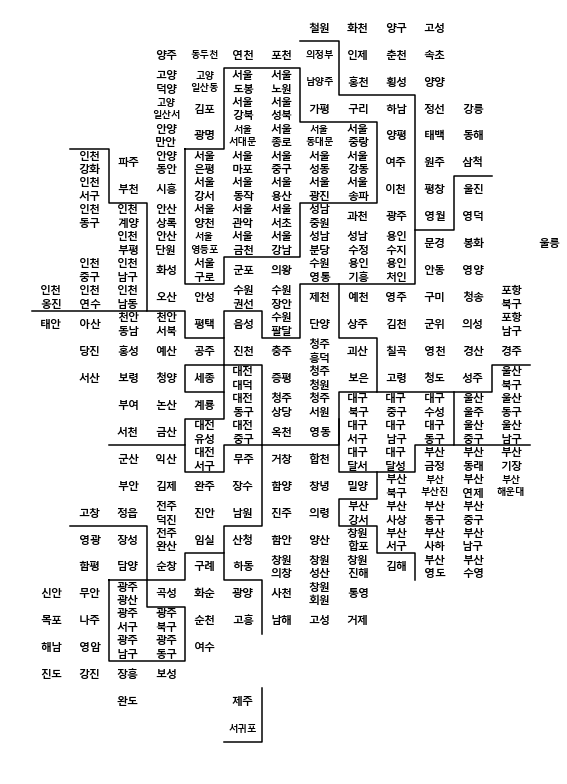

In [22]:
plt.figure(figsize=(8, 11))

# 지역 이름 표시
for idx, row in draw_korea.iterrows():
    
    # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. 
    # (중구, 서구)
    if len(row['ID'].split())==2:
        dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
    elif row['ID'][:2]=='고성':
        dispname = '고성'
    else:
        dispname = row['ID']

    # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
    if len(dispname.splitlines()[-1]) >= 3:
        fontsize, linespacing = 9.5, 1.5
    else:
        fontsize, linespacing = 11, 1.2

    plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                 fontsize=fontsize, ha='center', va='center', 
                 linespacing=linespacing)
    
# 시도 경계 그린다.
for path in BORDER_LINES:
    ys, xs = zip(*path)
    plt.plot(xs, ys, c='black', lw=1.5)

plt.gca().invert_yaxis()
#plt.gca().set_aspect(1)

plt.axis('off')

plt.tight_layout()
plt.show()

In [23]:
set(draw_korea['ID'].unique()) - set(pop['ID'].unique())

{'인천 남구'}

In [24]:
set(pop['ID'].unique()) - set(draw_korea['ID'].unique())

{'고양', '성남', '수원', '안산', '안양', '용인', '인천 미추홀', '전주', '창원', '천안', '청주', '포항'}

In [25]:
tmp_list = list(set(pop['ID'].unique()) - set(draw_korea['ID'].unique()))

for tmp in tmp_list:
    pop = pop.drop(pop[pop['ID']==tmp].index)
                       
print(set(pop['ID'].unique()) - set(draw_korea['ID'].unique()))

set()


In [26]:
pop.head()

,광역시도,시도,20-39세여자,20-39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID
0,강원도,강릉시,20913,45452,47789,105554,107213,212767,0.875222,True,강릉
1,강원도,고성군,1996,5066,8310,14091,13235,27326,0.480385,True,고성(강원)
2,강원도,동해시,7775,17865,19241,45713,44237,89950,0.808170,True,동해
3,강원도,삼척시,5354,11942,17033,32214,31516,63730,0.628662,True,삼척
4,강원도,속초시,8031,17947,16878,41074,41716,82790,0.951653,True,속초


In [27]:
pop = pd.merge(pop, draw_korea, how='left', on=['ID'])

pop.head()

,광역시도,시도,20-39세여자,20-39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID,y,x
0,강원도,강릉시,20913,45452,47789,105554,107213,212767,0.875222,True,강릉,3,11
1,강원도,고성군,1996,5066,8310,14091,13235,27326,0.480385,True,고성(강원),0,10
2,강원도,동해시,7775,17865,19241,45713,44237,89950,0.808170,True,동해,4,11
3,강원도,삼척시,5354,11942,17033,32214,31516,63730,0.628662,True,삼척,5,11
4,강원도,속초시,8031,17947,16878,41074,41716,82790,0.951653,True,속초,1,10


In [28]:
mapdata = pop.pivot_table(index='y', columns='x', values='인구수합계')
masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)

In [32]:
mapdata

x,0,1,2,3,4,5,6,7,8,9,10,11,12,13
y,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43044.0,24094.0,21651.0,27326.0,NaN,NaN,NaN
1,NaN,NaN,NaN,236327.0,93395.0,42725.0,148765.0,463977.0,32192.0,285202.0,82790.0,NaN,NaN,NaN
2,NaN,NaN,NaN,483743.0,298563.0,316631.0,510527.0,733995.0,68177.0,46459.0,27864.0,NaN,NaN,NaN
3,NaN,NaN,NaN,296466.0,486334.0,298074.0,431892.0,62247.0,191322.0,322697.0,35527.0,212767.0,NaN,NaN
4,NaN,NaN,NaN,236611.0,291331.0,305793.0,144575.0,337881.0,388606.0,121364.0,40515.0,89950.0,NaN,NaN
5,NaN,69801.0,485672.0,313216.0,472640.0,368560.0,122167.0,285137.0,461972.0,112469.0,358647.0,63730.0,NaN,NaN
6,NaN,562119.0,803585.0,511839.0,573531.0,385490.0,222413.0,340494.0,661452.0,222655.0,41162.0,47552.0,NaN,NaN
7,NaN,60848.0,294795.0,349515.0,446478.0,486209.0,410682.0,209991.0,77632.0,387646.0,37954.0,35187.0,NaN,NaN
8,NaN,NaN,485656.0,301904.0,376884.0,230856.0,533286.0,485124.0,235616.0,375137.0,71106.0,30635.0,NaN,8914.0


In [29]:
def drawKorea(targetData, blockedMap, cmapname):
    gamma = 0.75

    whitelabelmin = (max(blockedMap[targetData]) - min(blockedMap[targetData]))*0.25 + min(blockedMap[targetData])

    datalabel = targetData

    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])

    mapdata = blockedMap.pivot_table(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize=(9, 11))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, 
               edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. 
        #(중구, 서구)
        if len(row['ID'].split())==2:
            dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
        elif row['ID'][:2]=='고성':
            dispname = '고성'
        else:
            dispname = row['ID']

        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 10.0, 1.1
        else:
            fontsize, linespacing = 11, 1.

        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'
        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)

    # 시도 경계 그린다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=2)

    plt.gca().invert_yaxis()

    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.show()

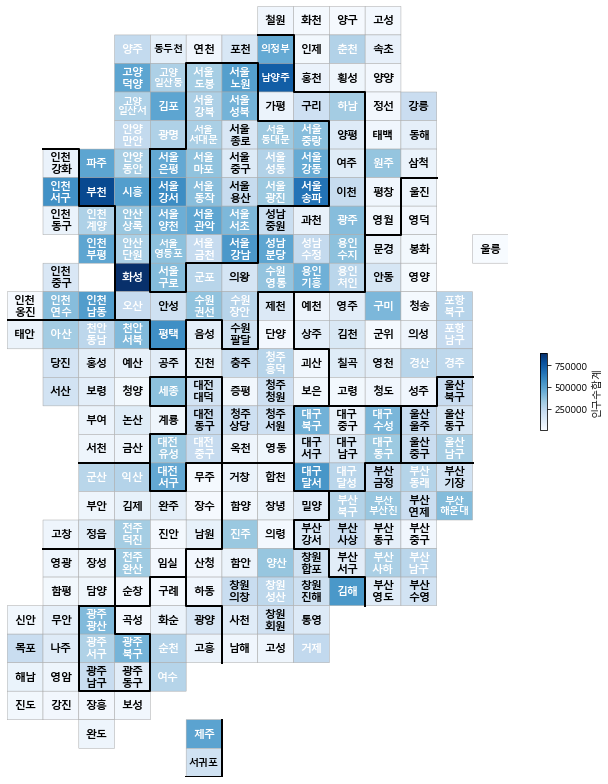

In [30]:
drawKorea('인구수합계', pop, 'Blues')

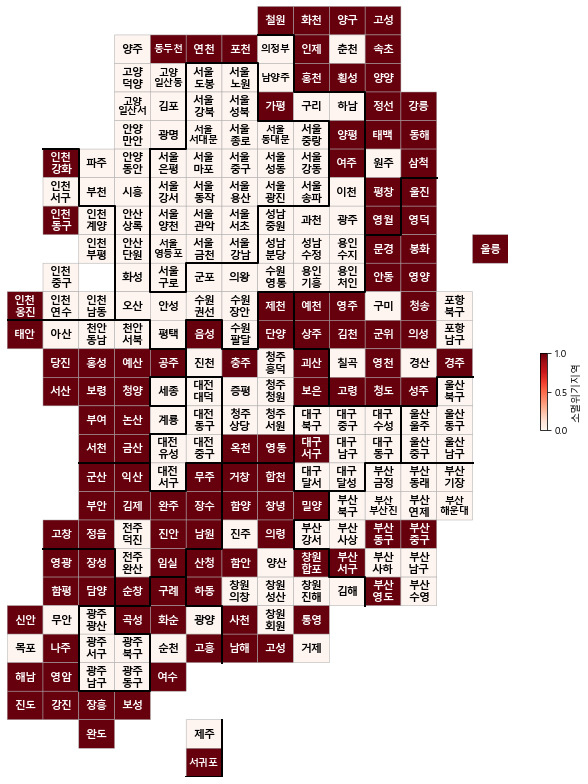

In [31]:
pop['소멸위기지역'] = [1 if con else 0 for con in pop['소멸위기지역']]
drawKorea('소멸위기지역', pop, 'Reds')

In [33]:
def drawKorea(targetData, blockedMap, cmapname):
    gamma = 0.75

    whitelabelmin = 20.

    datalabel = targetData

    tmp_max = max([ np.abs(min(blockedMap[targetData])), 
                                  np.abs(max(blockedMap[targetData]))])
    vmin, vmax = -tmp_max, tmp_max

    mapdata = blockedMap.pivot_table(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize=(9, 11))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, 
               edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. 
        #(중구, 서구)
        if len(row['ID'].split())==2:
            dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
        elif row['ID'][:2]=='고성':
            dispname = '고성'
        else:
            dispname = row['ID']

        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 10.0, 1.1
        else:
            fontsize, linespacing = 11, 1.

        annocolor = 'white' if np.abs(row[targetData]) > whitelabelmin else 'black'
        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)

    # 시도 경계 그린다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=2)

    plt.gca().invert_yaxis()

    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.show()

In [34]:
pop.head()

,광역시도,시도,20-39세여자,20-39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID,y,x
0,강원도,강릉시,20913,45452,47789,105554,107213,212767,0.875222,1,강릉,3,11
1,강원도,고성군,1996,5066,8310,14091,13235,27326,0.480385,1,고성(강원),0,10
2,강원도,동해시,7775,17865,19241,45713,44237,89950,0.808170,1,동해,4,11
3,강원도,삼척시,5354,11942,17033,32214,31516,63730,0.628662,1,삼척,5,11
4,강원도,속초시,8031,17947,16878,41074,41716,82790,0.951653,1,속초,1,10


C:\Users\SH\AppData\Local\Temp\ipykernel_7864\857876829.py:53: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
C:\Users\SH\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


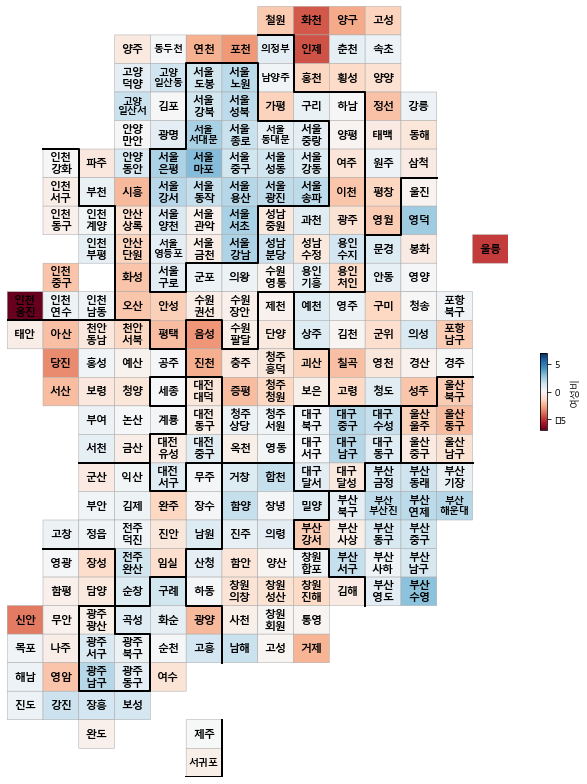

In [35]:
pop['여성비'] = (pop['인구수여자']/pop['인구수합계'] - 0.5)*100
drawKorea('여성비', pop, 'RdBu')

C:\Users\SH\AppData\Local\Temp\ipykernel_7864\857876829.py:53: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
C:\Users\SH\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


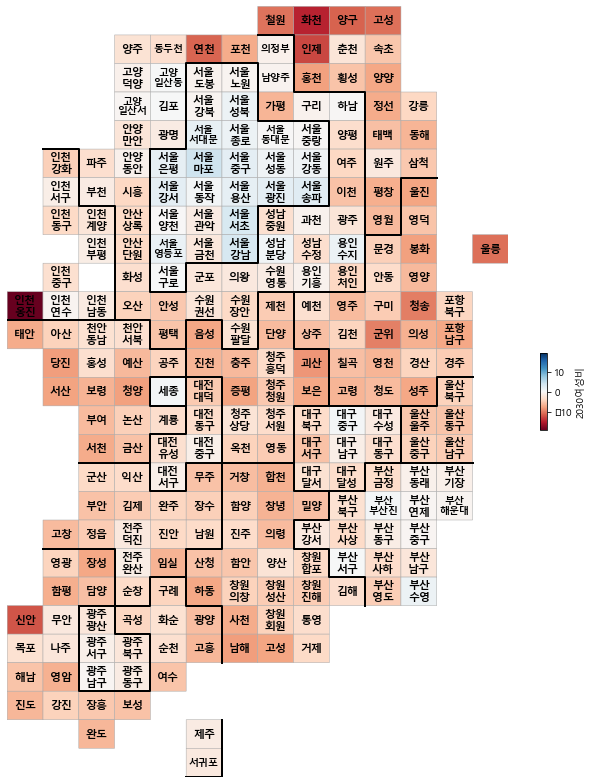

In [36]:
pop['2030여성비'] = (pop['20-39세여자']/pop['20-39세합계'] - 0.5)*100
drawKorea('2030여성비', pop, 'RdBu')

In [37]:
pop_folium = pop.set_index('ID')
pop_folium.head()

,광역시도,시도,20-39세여자,20-39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,y,x,여성비,2030여성비
ID,,,,,,,,,,,,,,
강릉,강원도,강릉시,20913,45452,47789,105554,107213,212767,0.875222,1,3,11,0.389863,-3.988823
고성(강원),강원도,고성군,1996,5066,8310,14091,13235,27326,0.480385,1,0,10,-1.566274,-10.600079
동해,강원도,동해시,7775,17865,19241,45713,44237,89950,0.808170,1,4,11,-0.820456,-6.479149
삼척,강원도,삼척시,5354,11942,17033,32214,31516,63730,0.628662,1,5,11,-0.547623,-5.166639
속초,강원도,속초시,8031,17947,16878,41074,41716,82790,0.951653,1,1,10,0.387728,-5.251574


In [38]:
import folium
import json
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [41]:
geo_path = '../data/05. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location=[36.2002, 127.054], zoom_start=7)
map.choropleth(geo_data = geo_str,
               data = pop_folium['인구수합계'],
               columns = [pop_folium.index, pop_folium['인구수합계']],
               fill_color = 'YlGnBu', #PuRd, YlGnBu
               key_on = 'feature.id')

map

In [42]:
map = folium.Map(location=[36.2002, 127.054], zoom_start=7)
map.choropleth(geo_data = geo_str,
               data = pop_folium['소멸위기지역'],
               columns = [pop_folium.index, pop_folium['소멸위기지역']],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on = 'feature.id')

map

In [43]:
draw_korea.to_csv("../data/05. draw_korea.csv", encoding='utf-8', sep=',')